In [1]:
from IPython.core.display import display, HTML, Javascript

# ----- Notebook Theme -----
color_map = ['#54BAB9', '#e8f3f6', '#d0e8ec', '#a2d1d9', '#73b4c6', '#4597b3', 
                        '#54BAB9', '#13688d', '#11637a', '#115e7a', '#0b3d53']

prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = ''' 

div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s; /* light orange */
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s; /* light orange */
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s; /* rgba(229, 143, 101, 0.1); light orange [exactly #E58F65] */
    border-top: 2px solid %s; /* light orange */
}

div.input_prompt {
color: %s; /* light blue */
}

div.output_prompt {
color: %s; /* strong orange */
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s; /* light orange */
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s; /* light orange */
}

.edit_mode div.cell.selected:before {
background: %s; /* light orange */
}

.edit_mode div.cell.selected {
border-color: %s; /* light orange */

}
'''
def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

In [2]:
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IHCC/BankChurners.csv")

In [4]:
df.shape

(10127, 23)

In [5]:
#dropping last 2 and client number column
df = df.iloc[:,1:-2]

In [6]:
df.shape

(10127, 20)

In [7]:
df.ndim

2

In [8]:
df.size

202540

In [9]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [10]:
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

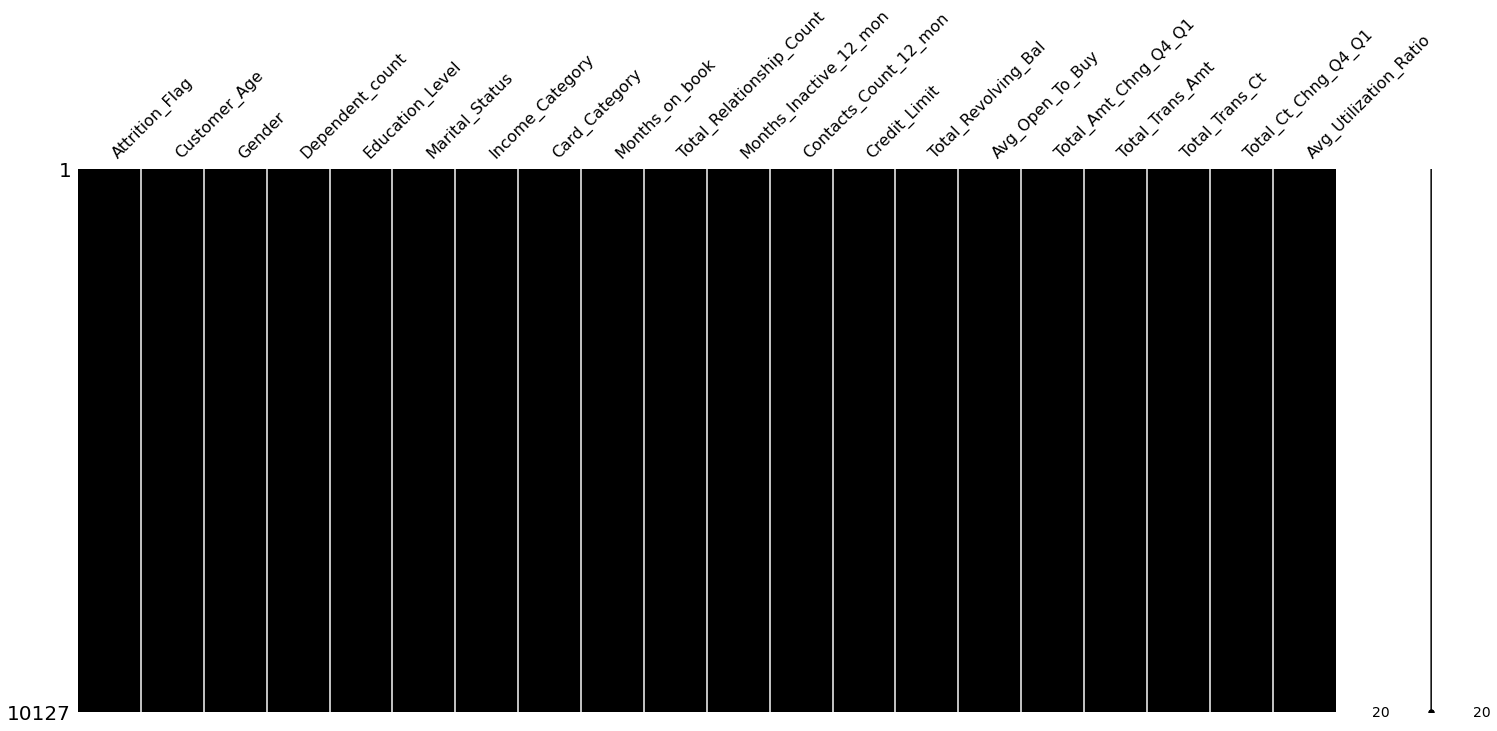

In [12]:
import missingno as mn
mn.matrix(df,color=(0,0,0))

In [13]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])
missing_data(df)

Total  Percentage
Attrition_Flag                0         0.0
Customer_Age                  0         0.0
Total_Ct_Chng_Q4_Q1           0         0.0
Total_Trans_Ct                0         0.0
Total_Trans_Amt               0         0.0
Total_Amt_Chng_Q4_Q1          0         0.0
Avg_Open_To_Buy               0         0.0
Total_Revolving_Bal           0         0.0
Credit_Limit                  0         0.0
Contacts_Count_12_mon         0         0.0
Months_Inactive_12_mon        0         0.0
Total_Relationship_Count      0         0.0
Months_on_book                0         0.0
Card_Category                 0         0.0
Income_Category               0         0.0
Marital_Status                0         0.0
Education_Level               0         0.0
Dependent_count               0         0.0
Gender                        0         0.0
Avg_Utilization_Ratio         0         0.0

In [14]:
#checking for any duplicates
df[df.duplicated()]

Empty DataFrame
Columns: [Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []

In [15]:
#numerical data
df.describe(exclude = 'object')

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [16]:
#catagorial data
df.describe(exclude = ['float', 'int64'])

Attrition_Flag Gender Education_Level Marital_Status  \
count               10127  10127           10127          10127   
unique                  2      2               7              4   
top     Existing Customer      F        Graduate        Married   
freq                 8500   5358            3128           4687   

       Income_Category Card_Category  
count            10127         10127  
unique               6             4  
top     Less than $40K          Blue  
freq              3561          9436

In [17]:
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [18]:
# Changing the Attrition_Flag to 0 and 1 (Hidden Input/Output)
df["Attrition_Flag"] = df["Attrition_Flag"].map({"Existing Customer":0, "Attrited Customer":1})

In [19]:
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0               0            45      M                3     High School   
1               0            49      F                5        Graduate   
2               0            51      M                3        Graduate   
3               0            40      F                4     High School   
4               0            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [20]:
#Finding the outliers
continuous_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
Colors = ['#f03a17']
## Lets analyse the continuous values by creating histograms to understand the distribution
for feature in continuous_feature:
    data=df.copy()
    fig = px.histogram(df, x= feature,title= 'Distribution of '+feature,color_discrete_sequence= Colors)
    fig.show()
print("Skewness: %f" % df['Attrition_Flag'].skew())
print("Kurtosis: %f" % df['Attrition_Flag'].kurt())

Skewness: 1.848449
Kurtosis: 1.417043


In [21]:
#%% PlotMultiplePie 
# Input: df = Pandas dataframe, categorical_features = list of features , dropna = boolean variable to use NaN or not
# Output: prints multiple px.pie() 

def PlotMultiplePie(df,categorical_features = None,dropna = False):
    # set a threshold of 30 unique variables, more than 50 can lead to ugly pie charts 
    threshold = 30
    
    # if user did not set categorical_features 
    if categorical_features == None: 
        categorical_features = df.select_dtypes(['object','category']).columns.to_list()
        print(categorical_features)
    
    # loop through the list of categorical_features 
    for cat_feature in categorical_features: 
        num_unique = df[cat_feature].nunique(dropna = dropna)
        num_missing = df[cat_feature].isna().sum()
        # prints pie chart and info if unique values below threshold 
        if num_unique <= threshold:
            print('Pie Chart for: ', cat_feature)
            print('Number of Unique Values: ', num_unique)
            print('Number of Missing Values: ', num_missing)
            fig = px.pie(df[cat_feature].value_counts(dropna = dropna), values=cat_feature, 
                 names = df[cat_feature].value_counts(dropna = dropna).index,title = cat_feature,template='ggplot2')
            fig.show()
        else: 
            print('Pie Chart for ',cat_feature,' is unavailable due high number of Unique Values ')
            print('Number of Unique Values: ', num_unique)
            print('Number of Missing Values: ', num_missing)
            print('\n')

In [22]:
PlotMultiplePie(df)

['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
Pie Chart for:  Gender
Number of Unique Values:  2
Number of Missing Values:  0


Pie Chart for:  Education_Level
Number of Unique Values:  7
Number of Missing Values:  0


Pie Chart for:  Marital_Status
Number of Unique Values:  4
Number of Missing Values:  0


Pie Chart for:  Income_Category
Number of Unique Values:  6
Number of Missing Values:  0


Pie Chart for:  Card_Category
Number of Unique Values:  4
Number of Missing Values:  0


In [23]:
num_cols = list(df.select_dtypes(["int64","float64"]))
cat_cols = list(df.select_dtypes("object"))

fig, ax = plt.subplots(ncols=2, nrows=14, figsize=(16, 40))
                
i = 0 #counter
for cols in num_cols[1:]:
    
    # Removing Outliers     
    Q3 = df[cols].quantile(0.99)
    df = df[df[cols] <= Q3]
    Q1 = df[cols].quantile(0.01)
    df = df[df[cols] >= Q1]
    
    sns.kdeplot(df[cols], fill=True, alpha=1, hue = df['Attrition_Flag'], 
                palette=('#33cc33', '#ff6666'), multiple='stack', ax=ax[i,0])
    
    sns.boxplot(data= df, y=cols, x='Attrition_Flag', ax=ax[i, 1],
               palette=('#33cc33', '#ff6666'), color='white')
    ax[i,0].set_xlabel(' ')
    ax[i,1].set_xlabel(' ')
    ax[i,1].set_ylabel(' ')
    ax[i,1].xaxis.set_tick_params(labelsize=14)
    ax[i,0].tick_params(left=False, labelleft=False)
    ax[i,0].set_ylabel(cols, fontsize=12)
    i=i+1
      
plt.show()

In [24]:
# list of numerical variables............
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))
print('\n')
print('Numberical Variables Column: ',numerical_features)
print('\n')
# visualise the numerical variables........
df[numerical_features].head().style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

Number of numerical variables:  15


Numberical Variables Column:  ['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']




In [25]:
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')

In [26]:
df_nunique = {var: pd.DataFrame(df['Attrition_Flag'].value_counts()) 
              for var in {'Attrition_Flag'}}
multi_table([ df_nunique['Attrition_Flag'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

In [27]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f']
fig.add_trace(go.Bar(y = df['Attrition_Flag'].value_counts().values.tolist(), 
                      x = df['Attrition_Flag'].value_counts().index, 
                      text=df['Attrition_Flag'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,10500])
iplot(fig)

In [28]:
df_nunique = {var: pd.DataFrame(df['Customer_Age'].value_counts()) 
              for var in {'Customer_Age'}}
multi_table([ df_nunique['Customer_Age'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

In [29]:
fig = make_subplots(rows=1,cols=1)
fig.add_trace(go.Bar(y = df['Customer_Age'].value_counts().values.tolist(), 
                      x = df['Customer_Age'].value_counts().index, 
                      text=df['Customer_Age'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = 'white',
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,650])
iplot(fig)

In [30]:
df['Age']=0
df.loc[(df['Customer_Age']>25)&(df['Customer_Age']<=35),'Age']=0
df.loc[(df['Customer_Age']>35)&(df['Customer_Age']<=45),'Age']=1
df.loc[(df['Customer_Age']>45)&(df['Customer_Age']<=55),'Age']=2
df.loc[(df['Customer_Age']>55)&(df['Customer_Age']<=65),'Age']=3
df.loc[df['Customer_Age']>65,'Age']=4
df['Age']=df['Age'].astype(int)

In [31]:
df.drop(['Customer_Age'],axis = 1,inplace = True)

In [32]:
df_nunique = {var: pd.DataFrame(df['Age'].value_counts()) 
              for var in {'Age'}}
multi_table([ df_nunique['Age'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

In [33]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f']
fig.add_trace(go.Bar(y = df['Age'].value_counts().values.tolist(), 
                      x = df['Age'].value_counts().index, 
                      text=df['Age'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,5000])
iplot(fig)

In [34]:
fig = px.histogram(df, x="Age", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

In [35]:
df_nunique = {var: pd.DataFrame(df['Dependent_count'].value_counts()) 
              for var in {'Dependent_count'}}
multi_table([ df_nunique['Dependent_count'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

In [36]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Dependent_count'].value_counts().values.tolist(), 
                      x = df['Dependent_count'].value_counts().index, 
                      text=df['Dependent_count'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,3200])
iplot(fig)

In [37]:
fig = px.histogram(df, x="Dependent_count", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

In [38]:
df_nunique = {var: pd.DataFrame(df['Months_on_book'].value_counts()) 
              for var in {'Months_on_book'}}
multi_table([ df_nunique['Months_on_book'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

In [39]:
fig = make_subplots(rows=1,cols=1)
fig.add_trace(go.Bar(y = df['Months_on_book'].value_counts().values.tolist(), 
                      x = df['Months_on_book'].value_counts().index, 
                      text=df['Months_on_book'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = 'white',
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,2800])
iplot(fig)

In [40]:
df['Bank_Relationship_Period']=0
df.loc[(df['Months_on_book']>=0)&(df['Months_on_book']<=10),'Bank_Relationship_Period']=0
df.loc[(df['Months_on_book']>10)&(df['Months_on_book']<=20),'Bank_Relationship_Period']=1
df.loc[(df['Months_on_book']>20)&(df['Months_on_book']<=30),'Bank_Relationship_Period']=2
df.loc[(df['Months_on_book']>30)&(df['Months_on_book']<=40),'Bank_Relationship_Period']=3
df.loc[df['Months_on_book']>50,'Bank_Relationship_Period']=4

In [41]:
df['Bank_Relationship_Period']=df['Bank_Relationship_Period'].astype(int)

In [42]:
df.drop(['Months_on_book'],axis = 1,inplace = True)

In [43]:
df_nunique = {var: pd.DataFrame(df['Bank_Relationship_Period'].value_counts()) 
              for var in {'Bank_Relationship_Period'}}
multi_table([ df_nunique['Bank_Relationship_Period'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])


In [44]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f']
fig.add_trace(go.Bar(y = df['Bank_Relationship_Period'].value_counts().values.tolist(), 
                      x = df['Bank_Relationship_Period'].value_counts().index, 
                      text=df['Bank_Relationship_Period'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,6500])
iplot(fig)

In [45]:
fig = px.histogram(df, x="Bank_Relationship_Period", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

In [46]:
df_nunique = {var: pd.DataFrame(df['Total_Relationship_Count'].value_counts()) 
              for var in {'Total_Relationship_Count'}}
multi_table([ df_nunique['Total_Relationship_Count'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

In [47]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Total_Relationship_Count'].value_counts().values.tolist(), 
                      x = df['Total_Relationship_Count'].value_counts().index, 
                      text=df['Total_Relationship_Count'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,2500])
iplot(fig)

In [48]:
fig = px.histogram(df, x="Total_Relationship_Count", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

In [49]:
df_nunique = {var: pd.DataFrame(df['Months_Inactive_12_mon'].value_counts()) 
              for var in {'Months_Inactive_12_mon'}}
multi_table([ df_nunique['Months_Inactive_12_mon'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

In [50]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Months_Inactive_12_mon'].value_counts().values.tolist(), 
                      x = df['Months_Inactive_12_mon'].value_counts().index, 
                      text=df['Months_Inactive_12_mon'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,4500])
iplot(fig)

In [51]:
df_nunique = {var: pd.DataFrame(df['Contacts_Count_12_mon'].value_counts()) 
              for var in {'Contacts_Count_12_mon'}}
multi_table([ df_nunique['Contacts_Count_12_mon'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

In [52]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Contacts_Count_12_mon'].value_counts().values.tolist(), 
                      x = df['Contacts_Count_12_mon'].value_counts().index, 
                      text=df['Contacts_Count_12_mon'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,4000])
iplot(fig)

In [53]:
fig = px.histogram(df, x="Contacts_Count_12_mon", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

In [54]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Credit_Limit']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,40000])

iplot(fig)

In [55]:
fig = px.histogram(df, x="Credit_Limit")
fig.show()

In [56]:
fig = px.histogram(df, x="Credit_Limit", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

In [57]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Total_Revolving_Bal']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,3500])
iplot(fig)

In [58]:
fig = px.histogram(df, x="Total_Revolving_Bal")
fig.show()

In [59]:
fig = px.histogram(df, x="Total_Revolving_Bal", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

In [60]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Avg_Open_To_Buy']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,40000])
iplot(fig)

In [61]:
fig = px.histogram(df, x="Avg_Open_To_Buy")
fig.show()

In [62]:
fig = px.histogram(df, x="Avg_Open_To_Buy", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

In [63]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Total_Amt_Chng_Q4_Q1']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,5])
iplot(fig)

In [64]:
fig = px.histogram(df, x="Total_Amt_Chng_Q4_Q1")
fig.show()

In [65]:
fig = px.histogram(df, x="Total_Amt_Chng_Q4_Q1", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

In [66]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Total_Trans_Amt']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,20000])
iplot(fig)

In [67]:
fig = px.histogram(df, x="Total_Trans_Amt")
fig.show()

In [68]:
fig = px.histogram(df, x="Total_Trans_Amt", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

In [69]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Total_Trans_Ct']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,150])
iplot(fig)

In [70]:
fig = px.histogram(df, x="Total_Trans_Ct")
fig.show()

In [71]:
fig = px.histogram(df, x="Total_Trans_Ct", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

In [72]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Total_Ct_Chng_Q4_Q1']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,6])
iplot(fig)


In [73]:
fig = px.histogram(df, x="Total_Ct_Chng_Q4_Q1")
fig.show()

In [74]:
fig = px.histogram(df, x="Total_Ct_Chng_Q4_Q1", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

In [75]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Avg_Utilization_Ratio']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,3])
iplot(fig)

In [76]:
fig = px.histogram(df, x="Avg_Utilization_Ratio")
fig.show()

In [77]:
fig = px.histogram(df, x="Avg_Utilization_Ratio", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

In [78]:
# list of categorical variables............
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('Number of categorical variables: ', len(cat_features))
print('Categorical variables column name:',cat_features)
# visualise the numerical variables........
df[cat_features].head().style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

Number of categorical variables:  5
Categorical variables column name: ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [79]:
df_nunique = {var: pd.DataFrame(df['Gender'].value_counts()) 
              for var in {'Gender'}}
multi_table([ df_nunique['Gender'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

In [80]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Gender'].value_counts().values.tolist(), 
                      x = df['Gender'].value_counts().index, 
                      text=df['Gender'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,8000])
iplot(fig)

In [81]:
fig = px.histogram(df, x="Gender", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

In [82]:
df_nunique = {var: pd.DataFrame(df['Education_Level'].value_counts()) 
              for var in {'Education_Level'}}
multi_table([ df_nunique['Education_Level'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

In [83]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Education_Level'].value_counts().values.tolist(), 
                      x = df['Education_Level'].value_counts().index, 
                      text=df['Education_Level'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,4000])
iplot(fig)


In [84]:
fig = px.histogram(df, x="Education_Level", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

In [85]:
df_nunique = {var: pd.DataFrame(df['Marital_Status'].value_counts()) 
              for var in {'Marital_Status'}}
multi_table([ df_nunique['Marital_Status'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

In [86]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Marital_Status'].value_counts().values.tolist(), 
                      x = df['Marital_Status'].value_counts().index, 
                      text=df['Marital_Status'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,5000])
iplot(fig)

In [87]:
fig = px.histogram(df, x="Marital_Status", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

In [88]:
df_nunique = {var: pd.DataFrame(df['Income_Category'].value_counts()) 
              for var in {'Income_Category'}}
multi_table([ df_nunique['Income_Category'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

In [89]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Income_Category'].value_counts().values.tolist(), 
                      x = df['Income_Category'].value_counts().index, 
                      text=df['Income_Category'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,4000])
iplot(fig)

In [90]:
fig = px.histogram(df, x="Income_Category", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

In [91]:
df_nunique = {var: pd.DataFrame(df['Card_Category'].value_counts()) 
              for var in {'Card_Category'}}
multi_table([ df_nunique['Card_Category'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

In [92]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Card_Category'].value_counts().values.tolist(), 
                      x = df['Card_Category'].value_counts().index, 
                      text=df['Card_Category'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,10000])
iplot(fig)

In [93]:
fig = px.histogram(df, x="Card_Category", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

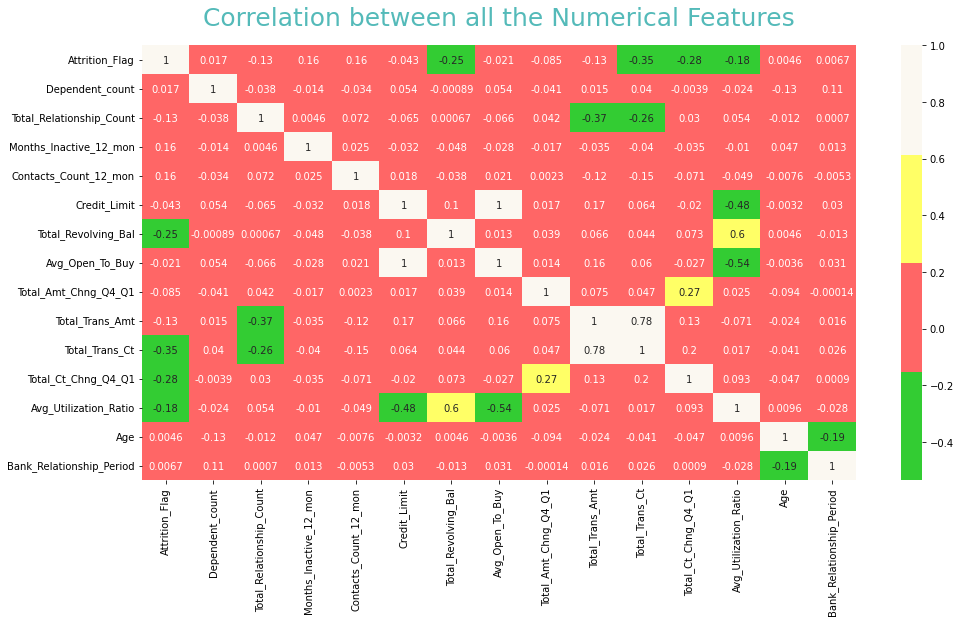

In [94]:
heat = df.corr()
plt.figure(figsize=[16,8])
plt.title("Correlation between all the Numerical Features", size=25, pad=20, color='#54BAB9')
sns.heatmap(heat, cmap=['#33cc33', '#ff6666','#ffff66','#fbf8f1'], annot=True)
plt.show()

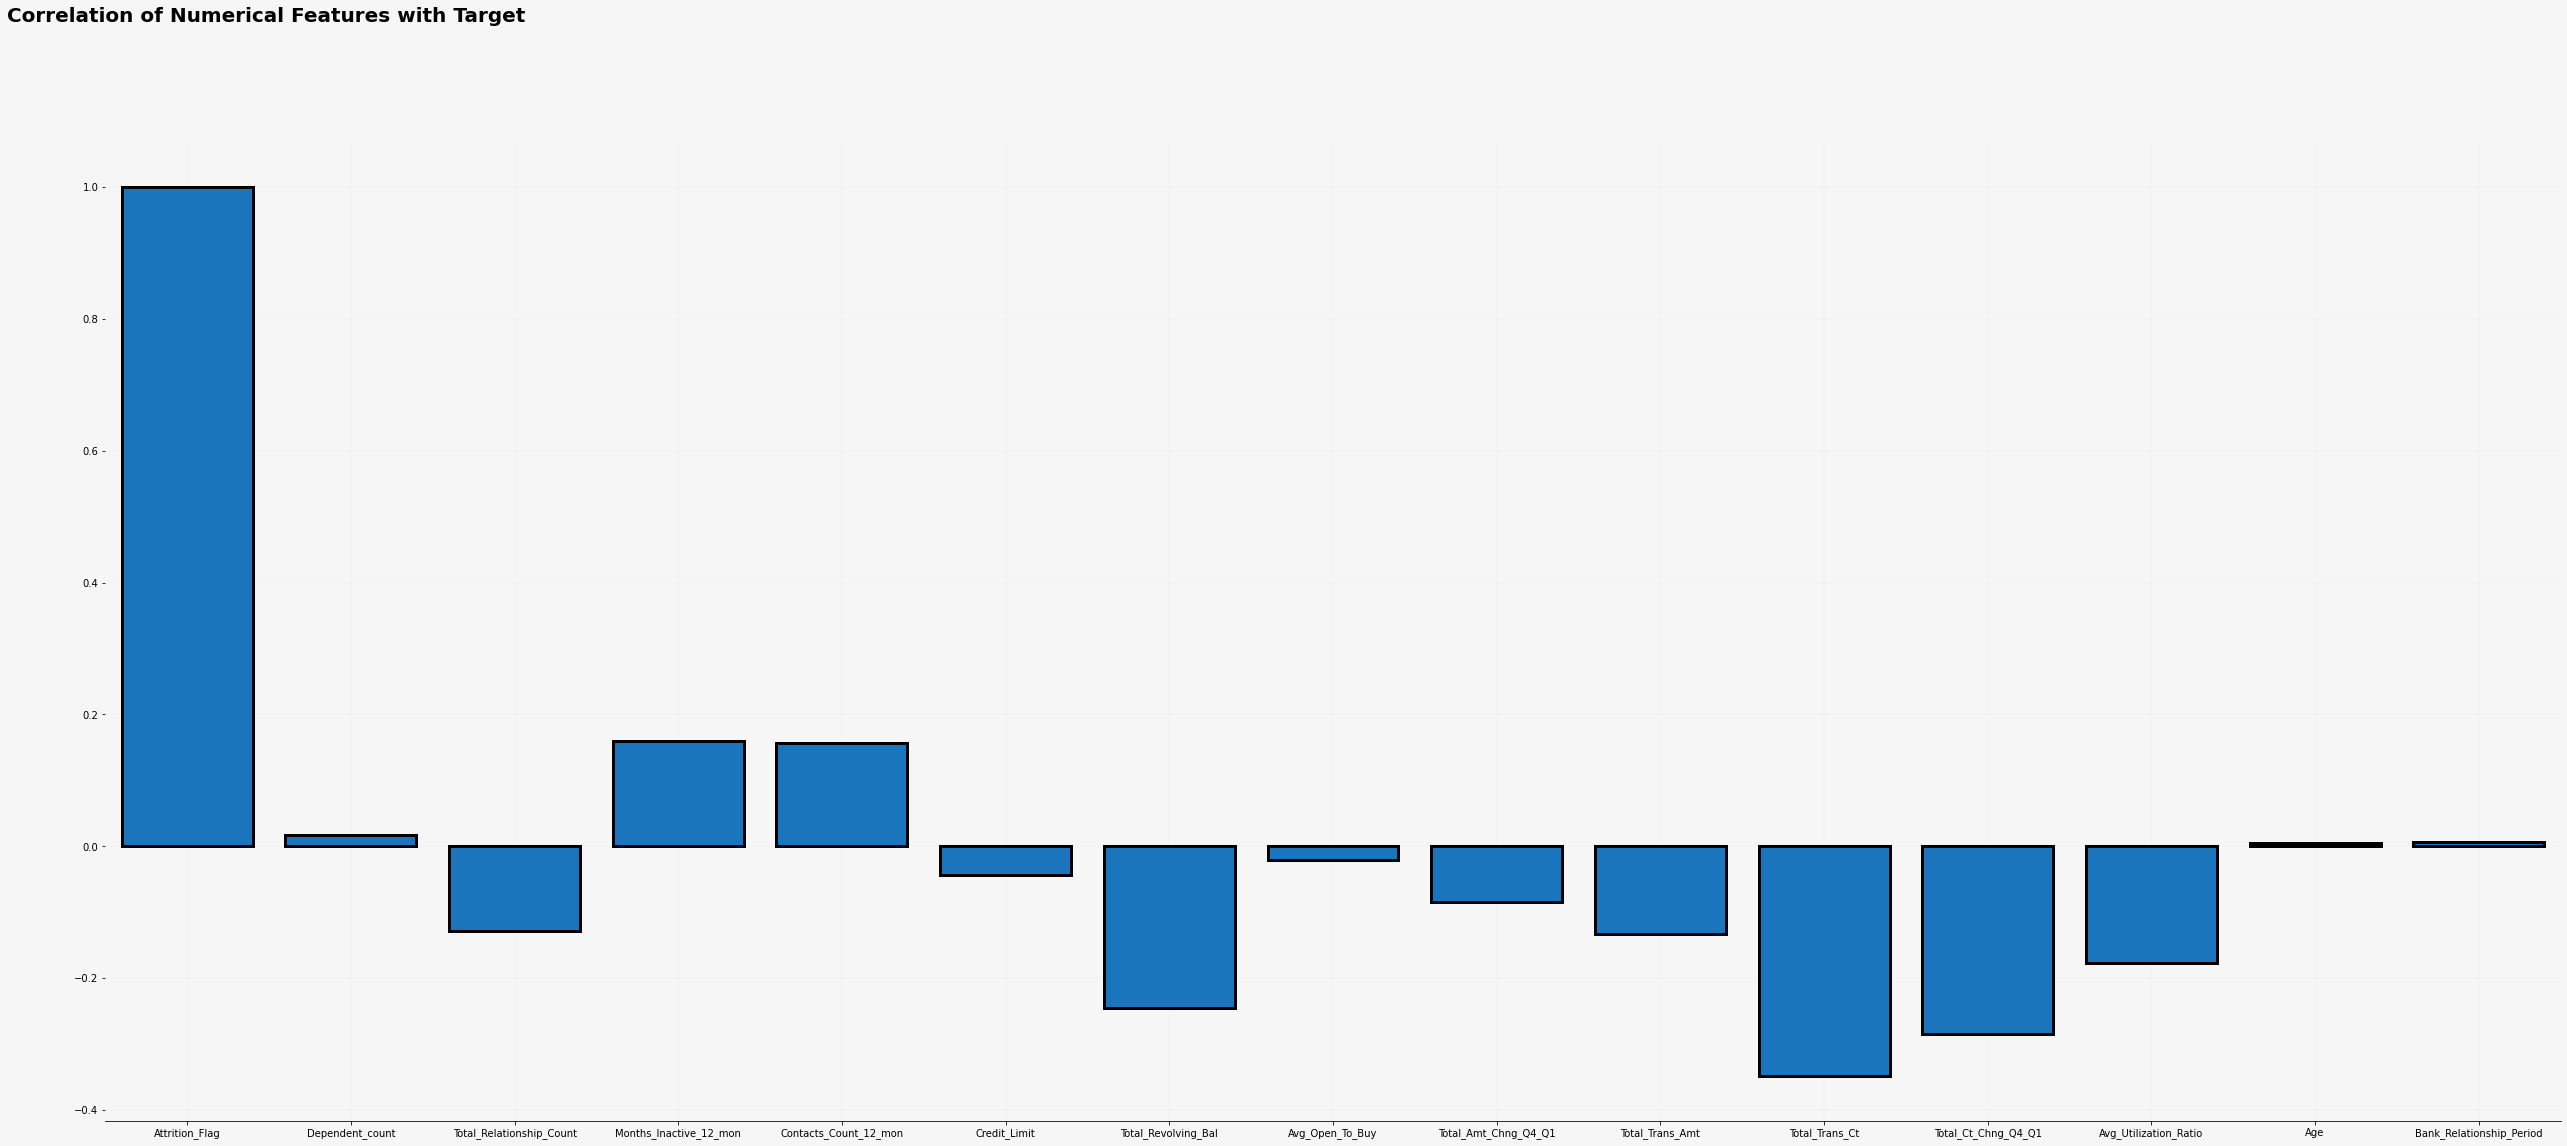

In [95]:
import matplotlib
background_color = "#f6f6f6"

fig = plt.figure(figsize=(44,18), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
colors = ["#0078d7"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.set_facecolor(background_color)
ax0.text(-1.1, 1.25, 'Correlation of Numerical Features with Target', fontsize=20, fontweight='bold')

chart_df = pd.DataFrame(df.corrwith(df['Attrition_Flag']))
chart_df.columns = ['corr']
sns.barplot(x=chart_df.index, y=chart_df['corr'], ax=ax0, color='#0078d7', zorder=3, edgecolor='black', linewidth=3)
ax0.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.set_ylabel('')

for s in ["top","right", 'left']:
    ax0.spines[s].set_visible(False)

plt.show()

In [96]:
df_new=pd.get_dummies(df, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'],drop_first=False)
print(df_new.shape)

(8768, 38)


In [97]:
df_new.columns

Index(['Attrition_Flag', 'Dependent_count', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Age', 'Bank_Relationship_Period', 'Gender_F',
       'Gender_M', 'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Pla

In [98]:
df = df_new[[ 'Dependent_count', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Age', 'Bank_Relationship_Period', 'Gender_F',
       'Gender_M', 'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver','Attrition_Flag']]
df.head(2).style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(df.drop('Attrition_Flag',axis=1))
scaled_features = scaler.transform(df.drop('Attrition_Flag',axis=1))

In [100]:
scaled_features = pd.DataFrame(scaled_features, columns = df.columns[:-1])
scaled_features.head().style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

In [101]:
X = scaled_features
y = df['Attrition_Flag']

In [102]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)

In [103]:
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score,plot_confusion_matrix
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [104]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [105]:
from sklearn import metrics
import plotly

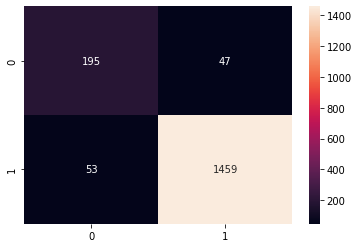

In [106]:
cf=metrics.confusion_matrix(y_test,dtc.predict(X_test), labels=[1,0])
sns.heatmap(cf,annot=True, fmt='d')

In [107]:
print(metrics.classification_report(y_test,dtc.predict(X_test), labels=[1,0]))
print('Accuracy_Score:',accuracy_score(y_test,dtc.predict(X_test))*100,'%')
print('Recall:',metrics.recall_score(y_test,dtc.predict(X_test))*100,'%')

              precision    recall  f1-score   support

           1       0.79      0.81      0.80       242
           0       0.97      0.96      0.97      1512

    accuracy                           0.94      1754
   macro avg       0.88      0.89      0.88      1754
weighted avg       0.94      0.94      0.94      1754

Accuracy_Score: 94.2987457240593 %
Recall: 80.57851239669421 %


In [108]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print('the accuracy of the model is:',accuracy_score(y_test,rf.predict(X_test))*100,'%')

the accuracy of the model is: 96.29418472063854 %


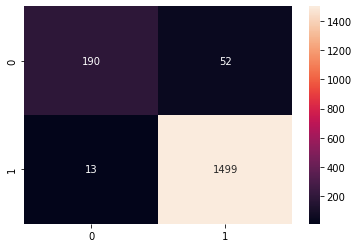

In [109]:
cf=metrics.confusion_matrix(y_test,rf.predict(X_test), labels=[1,0])
sns.heatmap(cf,annot=True, fmt='d')

In [110]:
print(metrics.classification_report(y_test,rf.predict(X_test), labels=[1,0]))
print('Accuracy_Score:',accuracy_score(y_test,rf.predict(X_test))*100,'%')
print('Recall:',metrics.recall_score(y_test,rf.predict(X_test))*100,'%')

              precision    recall  f1-score   support

           1       0.94      0.79      0.85       242
           0       0.97      0.99      0.98      1512

    accuracy                           0.96      1754
   macro avg       0.95      0.89      0.92      1754
weighted avg       0.96      0.96      0.96      1754

Accuracy_Score: 96.29418472063854 %
Recall: 78.51239669421489 %


In [111]:
adb = AdaBoostClassifier()
adb.fit(X_train,y_train)
y_pred = adb.predict(X_test)
print('the accuracy of the model is:',accuracy_score(y_test,adb.predict(X_test))*100,'%')

the accuracy of the model is: 96.63625997719498 %


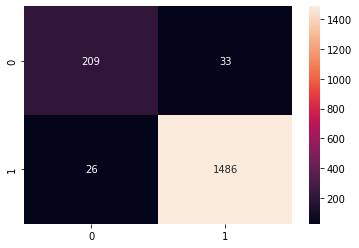

In [112]:
cf=metrics.confusion_matrix(y_test,adb.predict(X_test), labels=[1,0])
sns.heatmap(cf,annot=True, fmt='d')

In [113]:
print(metrics.classification_report(y_test,adb.predict(X_test), labels=[1,0]))
print('Accuracy_Score:',accuracy_score(y_test,adb.predict(X_test))*100,'%')
print('Recall:',metrics.recall_score(y_test,adb.predict(X_test))*100,'%')

              precision    recall  f1-score   support

           1       0.89      0.86      0.88       242
           0       0.98      0.98      0.98      1512

    accuracy                           0.97      1754
   macro avg       0.93      0.92      0.93      1754
weighted avg       0.97      0.97      0.97      1754

Accuracy_Score: 96.63625997719498 %
Recall: 86.36363636363636 %


In [114]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
print('The accuracy score using the XGBClassifier is :',accuracy_score(y_test,xgb.predict(X_test))*100,'%')

The accuracy score using the XGBClassifier is : 97.37742303306727 %


In [115]:
cf=metrics.confusion_matrix(y_test,xgb.predict(X_test), labels=[1,0])
sns.heatmap(cf,annot=True, fmt = 'd')

In [116]:
print(metrics.classification_report(y_test,xgb.predict(X_test), labels=[1,0]))
print('Accuracy_Score:',accuracy_score(y_test,xgb.predict(X_test))*100,'%')
print('Recall:',metrics.recall_score(y_test,xgb.predict(X_test))*100,'%')

              precision    recall  f1-score   support

           1       0.94      0.86      0.90       242
           0       0.98      0.99      0.98      1512

    accuracy                           0.97      1754
   macro avg       0.96      0.93      0.94      1754
weighted avg       0.97      0.97      0.97      1754

Accuracy_Score: 97.37742303306727 %
Recall: 86.36363636363636 %


In [117]:
# =============================================================================
# Cross validation on differnet set of algorithm!!!
# =============================================================================
################################################################
kfold = StratifiedKFold(n_splits=8,shuffle=True, random_state=42)


rs = 15
clrs = []

clrs.append(DecisionTreeClassifier(random_state = rs))
clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(AdaBoostClassifier(random_state=rs))
clrs.append(XGBClassifier(random_state=rs))

cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, X_train, y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
    
cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":['DecisionTreeClassifier',"RandomForestClassifier","AdaBoostClassifier","XGradient Boosting"]})
g = sns.barplot("CrossVal_Score_Means","Algo",data = cv_df,orient = "h",**{'xerr':cv_std},color = '#e39352')
g.set_xlabel("Mean Accuracy",fontsize = 18)
g = g.set_title("Cross validation scores",fontsize = 24)
plt.figure(figsize = (12,8))
print(cv_df)

   CrossVal_Score_Means  CrossValerrors                    Algo
0              0.939405        0.006404  DecisionTreeClassifier
1              0.957512        0.003327  RandomForestClassifier
2              0.954804        0.004425      AdaBoostClassifier
3              0.965498        0.003049      XGradient Boosting


<Figure size 864x576 with 0 Axes>

In [118]:
# Before
one_count=0
zero_count=0
for i in y:
    if i==1:
        one_count+=1
    else:
        zero_count+=1
print('The number of 0 are:',zero_count)
print('The number of 1 are:',one_count)

The number of 0 are: 7539
The number of 1 are: 1229


In [119]:
X_train2, X_test2, y_train2, y_test2 = train_test_split( X, y, test_size=0.2, random_state=20,shuffle=True)

In [120]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.combine import SMOTEENN
plotly.offline.init_notebook_mode (connected = True)

In [121]:
oversample = SMOTE()
X_train2, y_train2 = oversample.fit_resample(X_train2, y_train2)

In [122]:
# After
one_count=0
zero_count=0
for i in y_train:
    if i==1:
        one_count+=1
    else:
        zero_count+=1
print('The number of 0 are:',zero_count)
print('The number of 1 are:',one_count)

The number of 0 are: 6027
The number of 1 are: 987


In [123]:
from lightgbm import LGBMClassifier
lgbm2=LGBMClassifier()

In [124]:
lgbm2.fit(X_train2,y_train2)
print('The accuracy score of the model is :',accuracy_score(y_test2,lgbm2.predict(X_test2))*100,'%')

The accuracy score of the model is : 96.57924743443557 %


In [125]:
cf=metrics.confusion_matrix(y_test2,lgbm2.predict(X_test2), labels=[1,0])
sns.heatmap(cf,annot=True, fmt='d')

In [126]:
# Making the Report of the model
# Now let's have a look at the report
print(metrics.classification_report(y_test2,lgbm2.predict(X_test2), labels=[1,0]))
print('Accuracy_Score:',accuracy_score(y_test2,lgbm2.predict(X_test2))*100,'%')
print('Recall:',metrics.recall_score(y_test2,lgbm2.predict(X_test2))*100,'%')

              precision    recall  f1-score   support

           1       0.88      0.86      0.87       234
           0       0.98      0.98      0.98      1520

    accuracy                           0.97      1754
   macro avg       0.93      0.92      0.93      1754
weighted avg       0.97      0.97      0.97      1754

Accuracy_Score: 96.57924743443557 %
Recall: 86.32478632478633 %


In [127]:
X_train3, X_test3, y_train3, y_test3 = train_test_split( X, y, test_size=0.2, random_state=21)

In [128]:
lgbm3=LGBMClassifier()

In [129]:
# Before
one_count=0
zero_count=0
for i in y_train3:
    if i==1:
        one_count+=1
    else:
        zero_count+=1
print('The number of 0 are:',zero_count)
print('The number of 1 are:',one_count)

The number of 0 are: 6032
The number of 1 are: 982


In [130]:
sme = SMOTEENN(random_state=21)

In [131]:
X_train3,y_train3=sme.fit_resample(X_train3,y_train3)

In [132]:
one_count=0
zero_count=0
for i in y_train3:
    if i==1:
        one_count+=1
    else:
        zero_count+=1
print('The number of 0 are:',zero_count)
print('The number of 1 are:',one_count)

The number of 0 are: 3975
The number of 1 are: 5889


In [133]:
lgbm3.fit(X_train3,y_train3)
print('the accuracy score using this is :',accuracy_score(y_test3,lgbm3.predict(X_test3))*100,'%')

the accuracy score using this is : 95.43899657924743 %


In [134]:
cf=metrics.confusion_matrix(y_test3,lgbm3.predict(X_test3), labels=[1,0])
sns.heatmap(cf,annot=True, fmt='d')

In [135]:
# Making the Report of the model
# Now let's have a look at the report
print(metrics.classification_report(y_test3,lgbm3.predict(X_test3), labels=[1,0]))
print('Accuracy_Score:',accuracy_score(y_test3,lgbm3.predict(X_test3))*100,'%')
print('Recall:',metrics.recall_score(y_test3,lgbm3.predict(X_test3))*100,'%')

              precision    recall  f1-score   support

           1       0.79      0.93      0.85       247
           0       0.99      0.96      0.97      1507

    accuracy                           0.95      1754
   macro avg       0.89      0.94      0.91      1754
weighted avg       0.96      0.95      0.96      1754

Accuracy_Score: 95.43899657924743 %
Recall: 92.71255060728745 %


In [136]:
over = BorderlineSMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('o', over), ('u', under)]

In [137]:
X_train3, X_test3, y_train3, y_test3 = train_test_split( X, y, test_size=0.2, random_state=21)

In [138]:
one_count=0
zero_count=0
for i in y_train3:
    if i==1:
        one_count+=1
    else:
        zero_count+=1
print('The number of 0 are:',zero_count)
print('The number of 1 are:',one_count)

The number of 0 are: 6032
The number of 1 are: 982


In [139]:
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train3, y_train3 = pipeline.fit_resample(X_train3,y_train3)

In [140]:
one_count=0
zero_count=0
for i in y_train3:
    if i==1:
        one_count+=1
    else:
        zero_count+=1
print('The number of 0 are:',zero_count)
print('The number of 1 are:',one_count)

The number of 0 are: 3015
The number of 1 are: 1809


In [141]:
X_train3.head()

Dependent_count  Total_Relationship_Count  Months_Inactive_12_mon  \
0              0.4                       0.2                     0.4   
1              0.6                       0.8                     0.4   
2              0.6                       0.4                     0.2   
3              0.2                       0.6                     0.0   
4              0.8                       0.4                     0.0   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                    0.4      0.137062             0.000000         0.169324   
1                    0.4      1.000000             0.754867         0.952333   
2                    0.6      0.180233             0.252682         0.192599   
3                    0.4      0.403465             0.545888         0.387910   
4                    0.4      0.034365             0.848629         0.006721   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0              0.226221         0.888178        0.948980             0.402043   
1              0.565553         0.051246        0.132653             0.409471   
2              0.539846         0.044582        0.285714             0.210771   
3              0.496144         0.019859        0.000000             0.953575   
4              0.325621         0.291084        0.612245             0.569174   

   Avg_Utilization_Ratio       Age  Bank_Relationship_Period  Gender_F  \
0               0.000000  0.666667                      0.75       0.0   
1               0.063364  0.333333                      0.75       0.0   
2               0.099078  0.666667                      0.75       0.0   
3               0.107143  1.000000                      0.00       0.0   
4               0.956221  0.333333                      0.75       1.0   

   Gender_M  Education_Level_College  Education_Level_Doctorate  \
0       1.0                      0.0                        0.0   
1       1.0                      0.0                        0.0   
2       1.0                      0.0                        0.0   
3       1.0                      0.0                        0.0   
4       0.0                      1.0                        0.0   

   Education_Level_Graduate  Education_Level_High School  \
0                       0.0                          1.0   
1                       0.0                          0.0   
2                       0.0                          1.0   
3                       0.0                          1.0   
4                       0.0                          0.0   

   Education_Level_Post-Graduate  Education_Level_Uneducated  \
0                            0.0                         0.0   
1                            0.0                         0.0   
2                            0.0                         0.0   
3                            0.0                         0.0   
4                            0.0                         0.0   

   Education_Level_Unknown  Marital_Status_Divorced  Marital_Status_Married  \
0                      0.0                      0.0                     0.0   
1                      1.0                      0.0                     0.0   
2                      0.0                      0.0                     0.0   
3                      0.0                      0.0                     0.0   
4                      0.0                      0.0                     0.0   

   Marital_Status_Single  Marital_Status_Unknown  Income_Category_$120K +  \
0                    1.0                     0.0                      0.0   
1                    1.0                     0.0                      0.0   
2                    1.0                     0.0                      0.0   
3                    0.0                     1.0                      0.0   
4                    1.0                     0.0                      0.0   

   Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
0      

In [142]:
X_train3.columns

Index(['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Age',
       'Bank_Relationship_Period', 'Gender_F', 'Gender_M',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Cate

In [143]:
X_train3 = X_train3.drop(['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Age',
       'Bank_Relationship_Period', 'Gender_F', 'Gender_M',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'], axis = 1)

In [144]:
X_train3.head()

Total_Revolving_Bal  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1
0             0.000000         0.888178        0.948980             0.402043
1             0.754867         0.051246        0.132653             0.409471
2             0.252682         0.044582        0.285714             0.210771
3             0.545888         0.019859        0.000000             0.953575
4             0.848629         0.291084        0.612245             0.569174

In [145]:
X_test3 = X_test3.drop(['Dependent_count', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Age',
       'Bank_Relationship_Period', 'Gender_F', 'Gender_M',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'], axis = 1)

In [146]:
X_test3.head()

Total_Revolving_Bal  Total_Trans_Amt  Total_Trans_Ct  \
2071             0.790624         0.116687        0.428571   
7943             0.594756         0.537385        0.836735   
1654             0.842273         0.077502        0.326531   
6172             0.000000         0.265027        0.479592   
8139             0.559396         0.903372        0.744898   

      Total_Ct_Chng_Q4_Q1  
2071             0.593315  
7943             0.390901  
1654             0.197772  
6172             0.849582  
8139             0.532033

In [147]:
lgbm3=LGBMClassifier()
lgbm3.fit(X_train3,y_train3)
print('The accuracy score of this model is :',accuracy_score(y_test3,lgbm3.predict(X_test3))*100,'%')

The accuracy score of this model is : 92.24629418472064 %


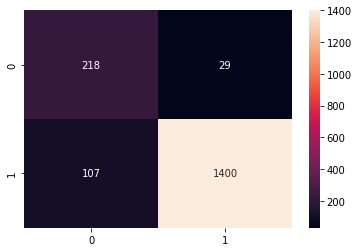

In [148]:
cf=metrics.confusion_matrix(y_test3,lgbm3.predict(X_test3), labels=[1,0])
sns.heatmap(cf,annot=True, fmt='d')

In [149]:
import pickle
import requests
import json

In [150]:
# Saving model to disk
pickle.dump(lgbm3, open('4model.pkl','wb'))
# Loading model to compare the results
model = pickle.load(open('4model.pkl','rb'))

In [151]:
# Making the Report of the model
# Now let's have a look at the report
print(metrics.classification_report(y_test3,lgbm3.predict(X_test3), labels=[1,0]))
print('Accuracy_Score:',accuracy_score(y_test3,lgbm3.predict(X_test3))*100,'%')
print('Recall:',metrics.recall_score(y_test3,lgbm3.predict(X_test3))*100,'%')

              precision    recall  f1-score   support

           1       0.67      0.88      0.76       247
           0       0.98      0.93      0.95      1507

    accuracy                           0.92      1754
   macro avg       0.83      0.91      0.86      1754
weighted avg       0.94      0.92      0.93      1754

Accuracy_Score: 92.24629418472064 %
Recall: 88.25910931174089 %


In [152]:
!apt-get install build-essential swig 
!pip install auto-sklearn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
swig is already the newest version (3.0.12-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [153]:
from sklearn.metrics import confusion_matrix, accuracy_score

Accuracy score 0.9640820980615735


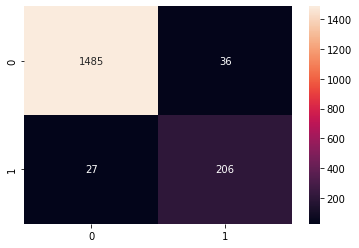

In [154]:
from autosklearn.classification import AutoSklearnClassifier
clf = AutoSklearnClassifier(time_left_for_this_task=300, 
                              per_run_time_limit=9, 
                              ensemble_size=1, 
                              initial_configurations_via_metalearning=0)
# Init training
clf.fit(X_train, y_train)
clf.score(X_train, y_train)
clf.score(X_test, y_test)
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(X_test)
print("Accuracy score", accuracy_score(y_test,y_pred))
conf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap(conf_matrix, annot=True, fmt = 'd')

In [155]:
print(clf.show_models())
print(clf.sprint_statistics())

{15: {'model_id': 15, 'rank': 1, 'cost': 0.03844492440604752, 'ensemble_weight': 1.0, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7fd45ed64cd0>, 'balancing': Balancing(random_state=1), 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7fd45f186450>, 'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7fd45eebe910>, 'sklearn_classifier': HistGradientBoostingClassifier(early_stopping=False,
                               l2_regularization=0.7812463554390713,
                               learning_rate=0.05630554676520665, max_iter=512,
                               max_leaf_nodes=86, min_samples_leaf=146,
                               n_iter_no_change=0, random_state=1,
                               validation_fraction=None, warm_start=True)}}
auto-sklearn results:
  Dataset name: 1fa10b74-cdc6-11ec-8254-0242ac1c0002

In [157]:
feature = pd.Series(xgb.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

Total_Trans_Ct                    0.205597
Total_Revolving_Bal               0.154433
Total_Relationship_Count          0.143745
Total_Ct_Chng_Q4_Q1               0.093932
Total_Trans_Amt                   0.085695
Months_Inactive_12_mon            0.075079
Gender_F                          0.056624
Total_Amt_Chng_Q4_Q1              0.040852
Avg_Open_To_Buy                   0.030205
Contacts_Count_12_mon             0.028017
Marital_Status_Married            0.022419
Age                               0.015915
Credit_Limit                      0.013680
Bank_Relationship_Period          0.012372
Income_Category_$60K - $80K       0.010033
Marital_Status_Single             0.003925
Dependent_count                   0.003199
Avg_Utilization_Ratio             0.002389
Education_Level_Unknown           0.001889
Card_Category_Blue                0.000000
Card_Category_Gold                0.000000
Income_Category_Unknown           0.000000
Income_Category_Less than $40K    0.000000
Income_Cate

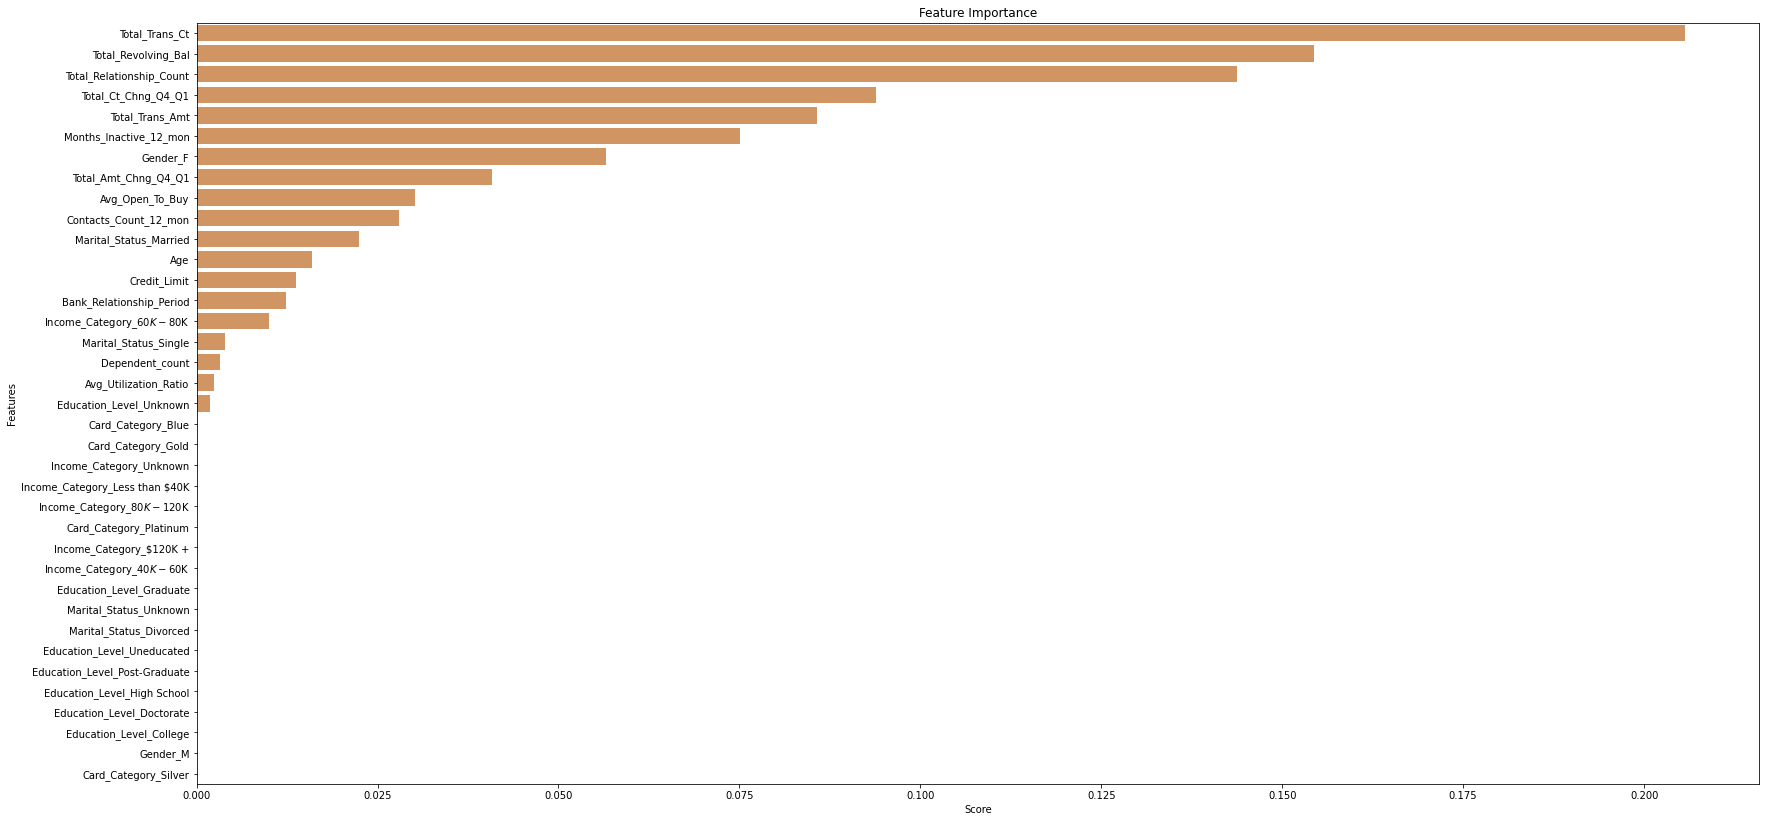

In [158]:
plt.figure(figsize = (28,14))
sns.barplot(x = feature, y = feature.index,color = '#e39352')
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()